In [ ]:
# Add lammps_logfile to available packages.
# This is a workaround since the lammps-logfile
# needs to be updated. This requirement will go away later.
import sys
sys.path.append('/drive')
%pip install pandas

Log keywords:  ['Atoms', 'Temp', 'Time', 'Volume', 'c_msd_heavy[4]', 'c_msd_light[4]']


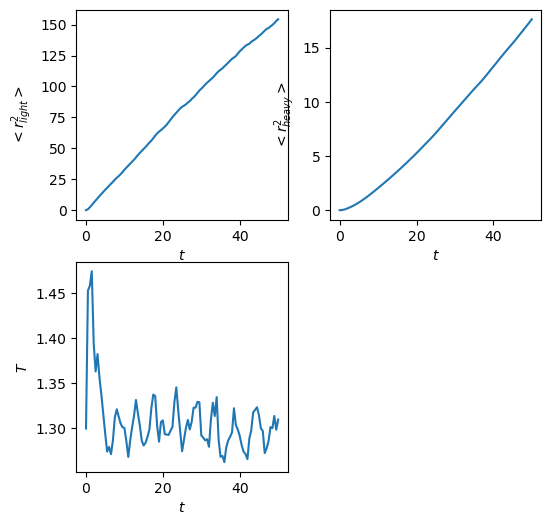

In [8]:
import os
import matplotlib.pyplot as plt

import lammps_logfile

log = lammps_logfile.File("log.lammps")

print("Log keywords: ", log.get_keywords())

x = log.get("Time")
y = log.get("c_msd_light[4]")

plt.figure(figsize=(6,6))
plt.subplot(221)
plt.plot(x, y)
plt.xlabel("$t$")
plt.ylabel("$<r^2_{light}>$")

plt.subplot(222)
for i in range(log.get_num_partial_logs()):
    x = log.get("Time", run_num=i)
    y = log.get("c_msd_heavy[4]", run_num=i)
    plt.plot(x, y)
    plt.xlabel("$t$")
    plt.ylabel("$<r^2_{heavy}>$")

plt.subplot(223)
x = log.get("Time")
y = log.get("Temp")
plt.plot(x, y)
plt.xlabel("$t$")
plt.ylabel("$T$")

plt.show()

